# C(conclusion、結論)：分析結果の考察、結論
分析結果から結論を導く

分析から得られた結果：
- 売上にはローンの有無・銀行の残高が影響を与える
- 成約率には持ち家の有無・結婚の状態が影響を与える
寄り高度な分析を行ったところ持ち家の有無が、成約に大きな影響があることがわかりました。持ち家の有無と成約について確認してみましょう。





## 【コード:デモ】

In [ ]:
# prompt: 持ち家の有無と成約の有無についてまとめて

import pandas as pd
# 持ち家の有無と成約の有無のクロス集計
pd.crosstab(data['持ち家の有無'], data['成約の有無'])


成約の有無,0,1,2
持ち家の有無,,,
0,2527,3354,0
1,3346,1935,0
2,0,0,3


In [ ]:
# prompt: 年齢列を10代ごとに区切って

data['年齢の10の位'] = data['年齢'] // 10 * 10
data.head()


,年齢,仕事,結婚状況,最終学歴,銀行残高,持ち家の有無,ローンの有無,day,成約の有無,売上,年齢の10の位
0,50.0,admin.,married,secondary,2343.0,1,0,5.0,1,23.43,50.0
1,50.0,admin.,married,secondary,45.0,0,0,5.0,1,0.45,50.0
2,40.0,technician,married,secondary,1270.0,1,0,5.0,1,12.70,40.0
3,50.0,services,married,secondary,2476.0,1,0,5.0,1,24.76,50.0
4,50.0,admin.,married,tertiary,184.0,0,0,5.0,1,1.84,50.0


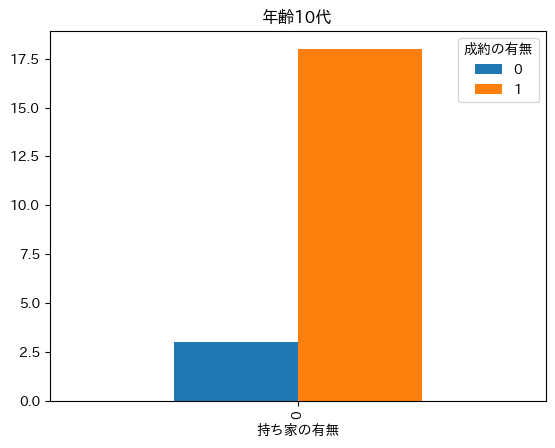

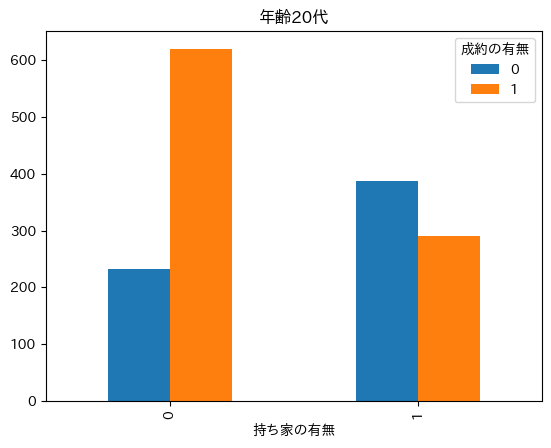

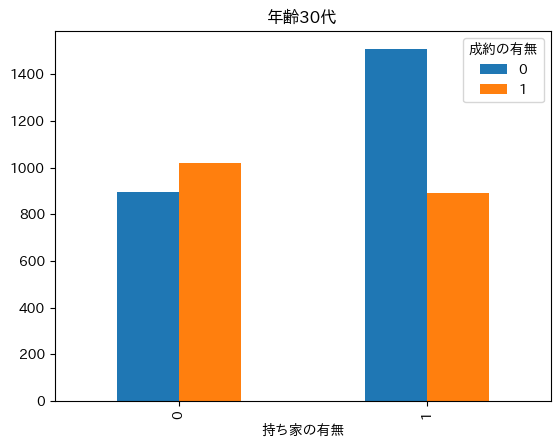

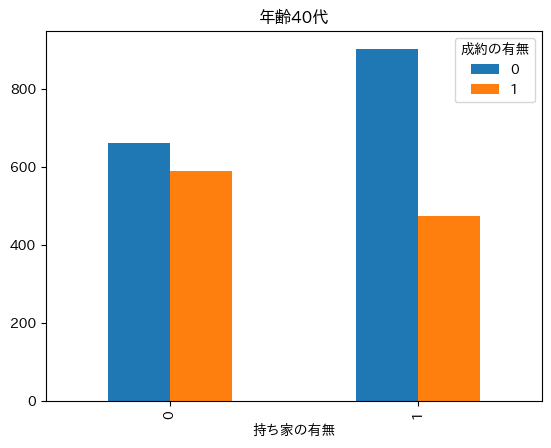

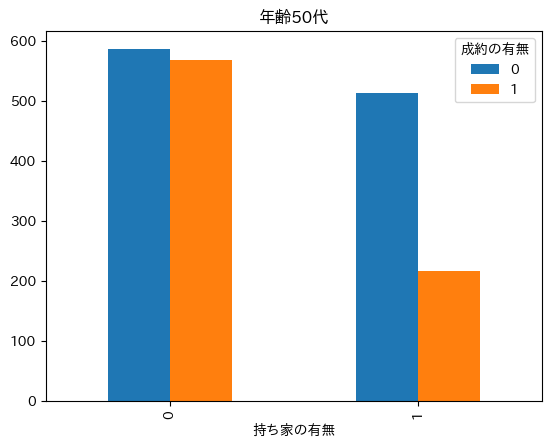

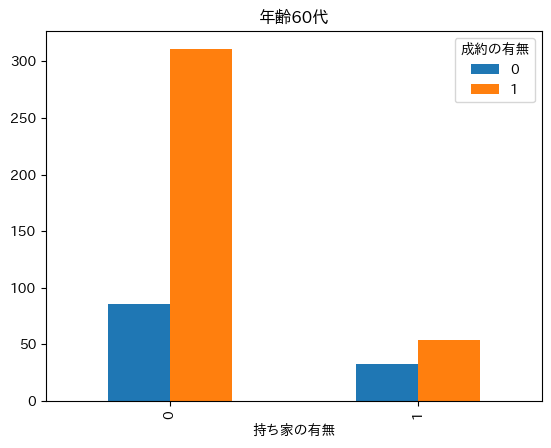

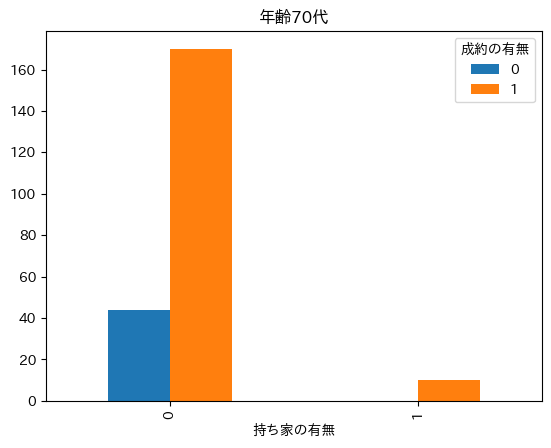

In [ ]:
# prompt: 年齢列と持ち家の有無、成約の有無の関係性を可視化して

import pandas as pd
import matplotlib.pyplot as plt
# 年齢の10の位と持ち家の有無、成約の有無の関係性を可視化
for i in range(10, 80, 10):
    df_tmp = data[(data['年齢の10の位'] == i)]
    pd.crosstab(df_tmp['持ち家の有無'], df_tmp['成約の有無']).plot.bar()
    plt.title(f'年齢{i}代')
    plt.show()


20,60,70  代の持ち家のない人が成約をしている。

60 代の人の持ち家のない人の詳細を探索する

In [ ]:
# prompt: 60代で持ち家の有無が0の人の職業は

data[(data['年齢の10の位'] == 60) & (data['持ち家の有無'] == 0)]['仕事'].value_counts()


仕事
retired          214
management        60
admin.            25
housemaid         25
blue-collar       21
technician        20
self-employed     14
entrepreneur       7
unemployed         6
unknown            3
services           2
Name: count, dtype: int64

Retireしている人が多い。


持ち家が0の人のとローンの有無と売上の関係を可視化

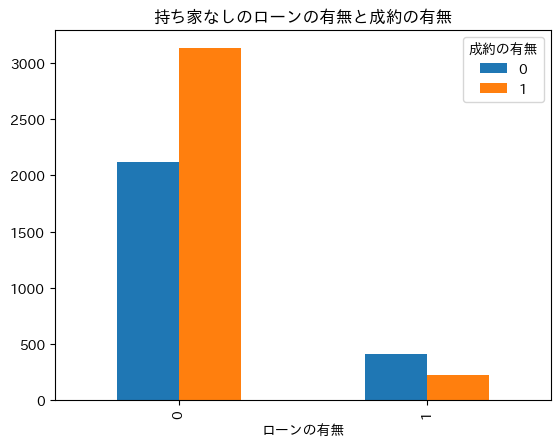

In [ ]:
# prompt: 持ち家が0の人のとローンの有無と売上の関係を可視化して

import pandas as pd
import matplotlib.pyplot as plt
loan_no_df = data[data['持ち家の有無'] == 0]
pd.crosstab(loan_no_df['ローンの有無'], loan_no_df['成約の有無']).plot.bar()
plt.title('持ち家なしのローンの有無と成約の有無')
plt.show()


## 最終結論
- データ分析の結果、持ち家の有無が成約数に大きな影響を与える。中でも60代以降の高齢者で仕事を退職した、持ち家のない人を優先的にアプローチしていく。    
- 更に、持ち家も、ローンもない人は定期預金口座に対して貯金も多くしてくれることがわかった。絶対数は少なそうだが、優先的にアプローチを行う。